# 🔥XAI - Thực hành Biểu đồ Phụ thuộc Từng phần (PDP)🔥

## 1. Tạo mô hình với bộ dữ liệu về giá nhà trung bình California Housing Dataset

California Housing Dataset gồm 20640 bản ghi với 8 đặc trưng dự đoán và nhãn `target`, trong đó các đặc trưng mang ý nghĩa như sau:

|Đặc trưng| Ý nghĩa|
|-|-|
|`MedInc`    | Thu nhập trung bình                   |
|`HouseAge`  | Tuổi nhà trung bình                   |
|`AveRooms`  | Số phòng trung bình                   |
|`AveBedrms` | Số phòng ngủ trung bình               |
|`Population`| Số thành viên hộ gia đình trung bình  |
|`AveOccup`  | Số thành viên hộ gia đình trung bình  |
|`Latitude`  | Vĩ độ                                 |
|`Longitude` | Kinh độ                               |

Đây là tập dữ liệu có sẵn trong thư viện Sklearn nên chúng ta hoàn toàn có thế gọi ra thông qua hàm `fetch_california_housing()`. Tương tự như các bài toán học máy thông thường, ta chia dữ liệu thành tập huấn luyện và tập kiểm thử và sử dụng mô hình Random Forest để huấn luyện và dự đoán trên cả 2 tập dữ liệu đã chia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [2]:
# Khởi tạo dữ liệu
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
Y = pd.Series(housing.target)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [3]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
# Khởi tạo mô hình Random Forest
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
# Fit dữ liệu huấn luyện vào mô hình đã khởi tạo
regr.fit(X_train, Y_train)

# Dự đoán nhãn trên tập huấn luyện và tập kiểm thử
Y_predict_train = regr.predict(X_train)
Y_predict = regr.predict(X_test)

## 2. Lựa chọn những đặc trưng quan trọng (feature importance)

Một trong những lí do chúng mình chọn mô hình Random Forest đó là bởi chúng ta có thể dễ dàng trực quan những đặc trưng quan trọng, được sử dụng nhiều trong mô hình. Để đánh giá đặc trưng quan trọng cũng như trực quan hoá thứ tự quan trọng của các đặc trưng này, chúng ta có thể làm như sau:

In [4]:
# Hàm trực quan hoá trung bình mức quan trọng của các đặc trưng
def feature_plot_importance(importance_df):
  plt.rcParams.update({'font.size': 16})
  plt.rcParams["figure.figsize"] = (12,5)
  fig, ax = plt.subplots()
  x = np.arange(len(importance_df))
  width = 0.77
  rects1 = ax.bar(x, 
                  height = importance_df['means'], 
                  width = width, 
                  yerr = importance_df['stds'], 
                  align='center', 
                  ecolor='black', 
                  capsize=5)
  ax.set_ylabel('Feature Importance')
  ax.set_xticks(x)
  ax.set_xticklabels(importance_df['feature_labels'])
  ax.set_title('Feature Importance Initial Model')
  plt.tight_layout()

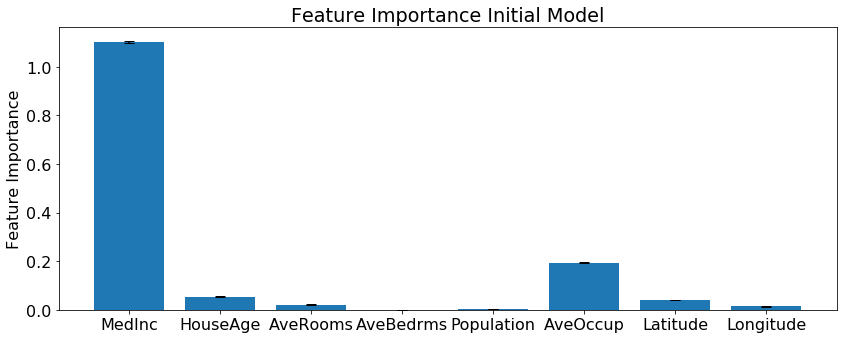

In [5]:
# Đánh giá đặc trưng quan trọng trên tập huấn luyện
perm_feature_importance = permutation_importance(regr, X_train, Y_train)

# Tạo DataFrame chứa nhãn và trung bình, độ lệch chuẩn mức quan trọng
importance_df = pd.DataFrame({'feature_labels': X_train.columns,
                              'means' : perm_feature_importance['importances_mean'],
                              'stds' : perm_feature_importance['importances_std']})

# Trực quan hoá trung bình mức quan trọng của các đặc trưng
feature_plot_importance(importance_df)

Dựa vào feature importance từ mô hình Random Forest, có thể thấy `MedInc`, `AveOccup`, `HouseAge` là 3 đặc trưng quan trọng. Ta hoàn toàn có thể xây dựng 1 mô hình Random Forest mới với chỉ những đặc trưng quan trọng.

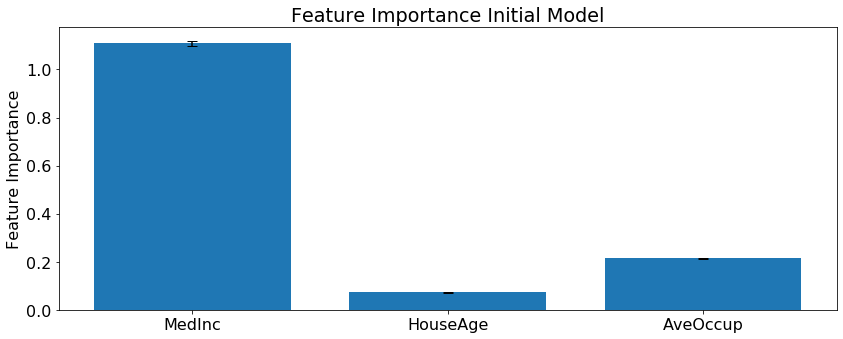

In [6]:
# Chọn lọc những đặc trưng có điểm feature importance cao
X_train_reduced = X_train.loc[:,['MedInc','HouseAge','AveOccup']]

# Khởi tạo mô hình Random Forest
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr.fit(X_train_reduced, Y_train)

perm_feature_importance = permutation_importance(regr, X_train_reduced, Y_train)

# Tạo DataFrame chứa nhãn và trung bình, độ lệch chuẩn mức quan trọng
importance_df_reduced = pd.DataFrame({'feature_labels': X_train_reduced.columns,
                                      'means' : perm_feature_importance['importances_mean'],
                                      'stds' : perm_feature_importance['importances_std']})

# Trực quan hoá trung bình mức quan trọng của các đặc trưng
feature_plot_importance(importance_df_reduced)

Dựa vào feature importance từ mô hình Random Forest, có thể thấy `MedInc`, `AveOccup`, `HouseAge` là 3 đặc trưng quan trọng. Nhưng chỉ dựa vào đặc trưng thì khó có thể thấy được mối liên hệ giữa đặc trưng đó với việc mô hình đưa ra kết quả dự đoán. Để giải quyết vấn đề này, chúng ta sẽ cùng nhau đến với Biểu đồ Phụ thuộc Từng phần (Partial Dependence Plot).

# 3. Minh họa cách tạo ra Biểu đồ Phụ thuộc Từng phần
### 3.1. Sử dụng Scikit-Learn
Biểu đồ PDP:
- 1D: biểu diễn sự phụ thuộc giữa mục tiêu dự đoán và những đặc trương được quan tâm (features of interest - những đặc trưng được lựa chọn bởi feature importance)
- 2D: biểu diễn sự phụ thuộc giữa 2 đặc trưng được quan tâm và tác động của nó lên mục tiêu dự đoán

Chúng ta có thể biểu diễn biểu đồ này thông qua `PartialDependenceDisplay.from_estimator()` từ thư viện `sklearn.inspection`.

In [7]:
from sklearn.inspection import PartialDependenceDisplay

Với biểu đồ DPD 1D,  ta có:

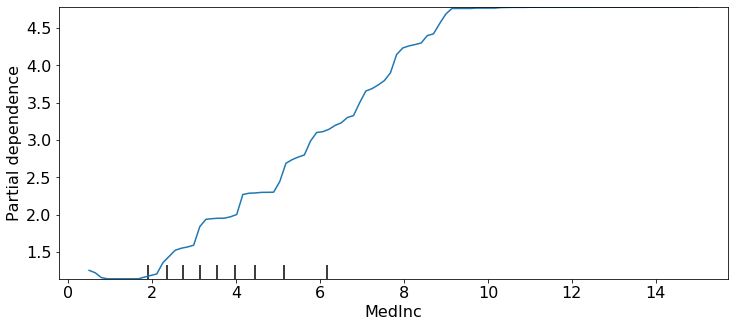

In [8]:
PartialDependenceDisplay.from_estimator(regr, 
                                        X_train_reduced, 
                                        features = ['MedInc'], 
                                        percentiles = [0,1]);

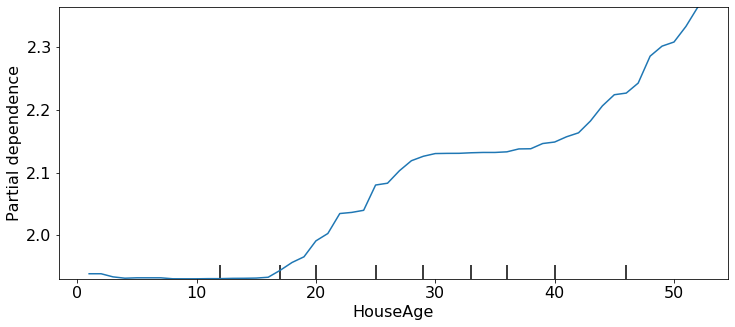

In [9]:
PartialDependenceDisplay.from_estimator(regr, 
                                        X_train_reduced, 
                                        features = ['HouseAge'], 
                                        percentiles = [0,1]);

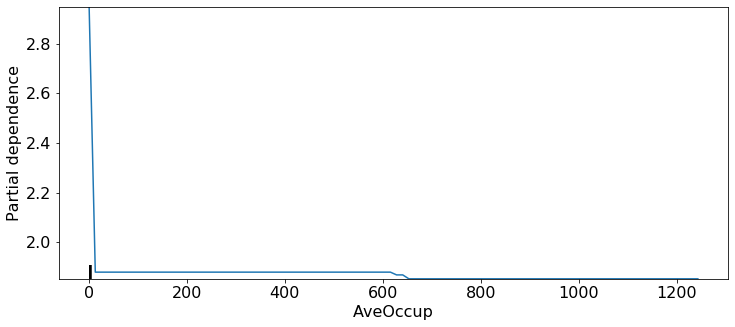

In [10]:
PartialDependenceDisplay.from_estimator(regr, 
                                        X_train_reduced, 
                                        features = ['AveOccup'], 
                                        percentiles = [0,1]);

Với biểu đồ DPD 2D,  ta có:

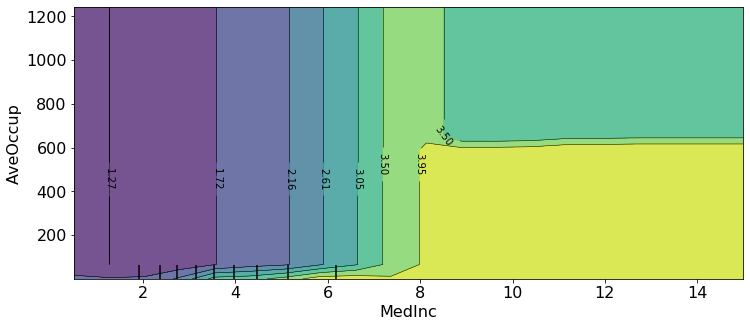

In [11]:
MedInc_AvcOccup_disp = PartialDependenceDisplay.from_estimator(regr, 
                                                               X_train_reduced, 
                                                               features = [(0,2)], 
                                                               percentiles = [0,1],
                                                               grid_resolution = 20)

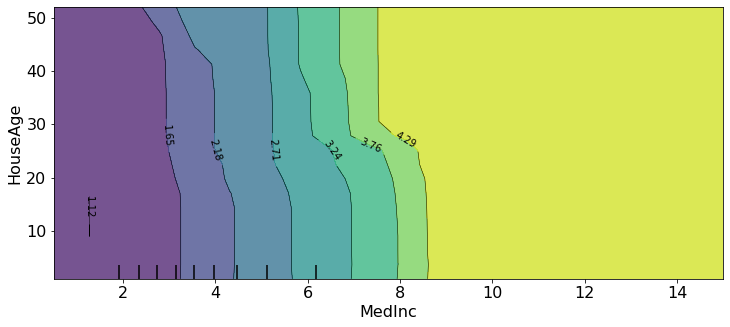

In [12]:
MedInc_HouseAge_disp = PartialDependenceDisplay.from_estimator(regr, 
                                                               X_train_reduced, 
                                                               features = [(0,1)], 
                                                               percentiles = [0,1], 
                                                               grid_resolution = 20)

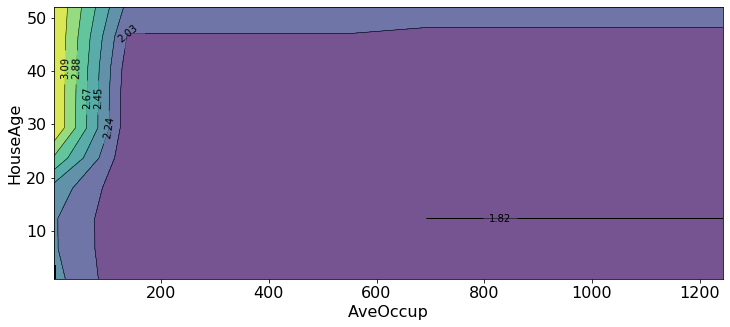

In [13]:
AveOccup_HouseAge_disp = PartialDependenceDisplay.from_estimator(regr, 
                                                                 X_train_reduced, 
                                                                 features = [(2,1)], 
                                                                 percentiles = [0,1], 
                                                                 grid_resolution = 10)

Ta hoàn toàn có thể thêm các điểm dữ liệu vào biểu đồ PDP bằng cách sau:

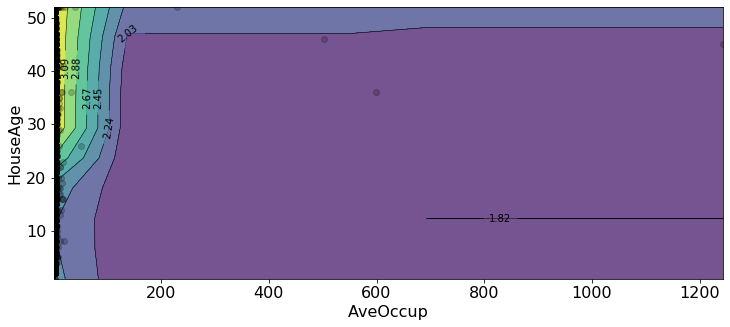

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
AveOccup_HouseAge_disp.plot(ax = ax)
plt.scatter(X_train_reduced['AveOccup'], 
            X_train_reduced['HouseAge'],
            alpha = 0.2, 
            color = 'black');

## 3.2. Sử dụng thư viện PDPbox
- Cài đặt thư viện: !pip install pdpbox
- Link: https://github.com/SauceCat/PDPbox

In [15]:
from pdpbox import pdp

Có thể thấy tương tự như biểu đồ PDP của Scikit-Learn, với đặc trưng `MedInc`, giá nhà trung bình cũng tăng khi thu nhập trung bình tăng (với `MedInc` lớn hơn 2). Với thu nhập trung bình lớn hơn khoảng 6, giá nhà tăng khá nhiều và ổn định. 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


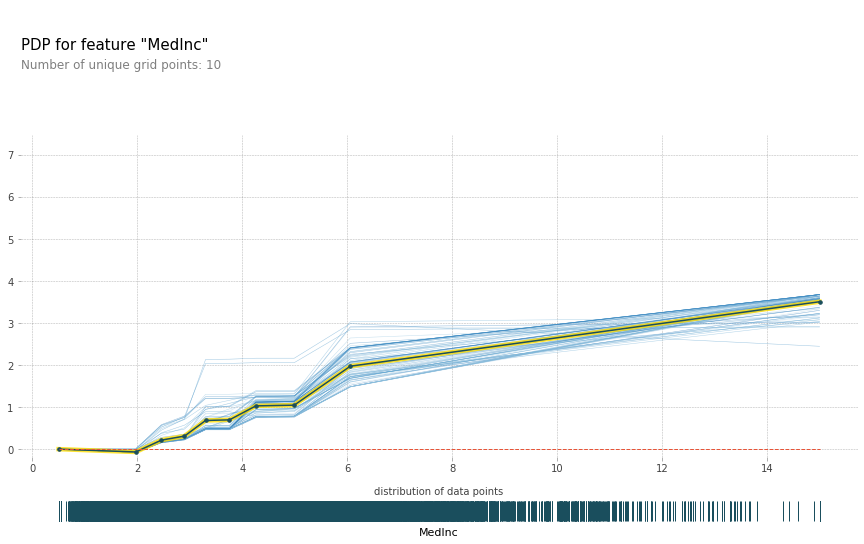

In [16]:
pdp_MedInc = pdp.pdp_isolate(model=regr, 
                             dataset=X_train_reduced, 
                             model_features=X_train_reduced.columns, 
                             feature='MedInc')
fig, axes = pdp.pdp_plot(pdp_MedInc, 'MedInc', plot_lines=True, frac_to_plot=100, plot_pts_dist=True);

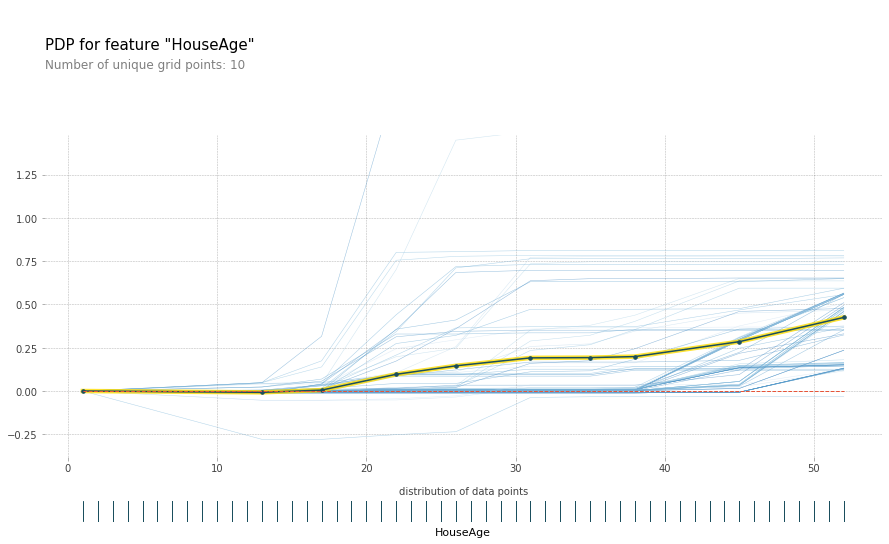

In [17]:
pdp_MedInc = pdp.pdp_isolate(model=regr, 
                             dataset=X_train_reduced, 
                             model_features=X_train_reduced.columns, 
                             feature='HouseAge')
fig, axes = pdp.pdp_plot(pdp_MedInc, 'HouseAge', plot_lines=True, frac_to_plot=100, plot_pts_dist=True);

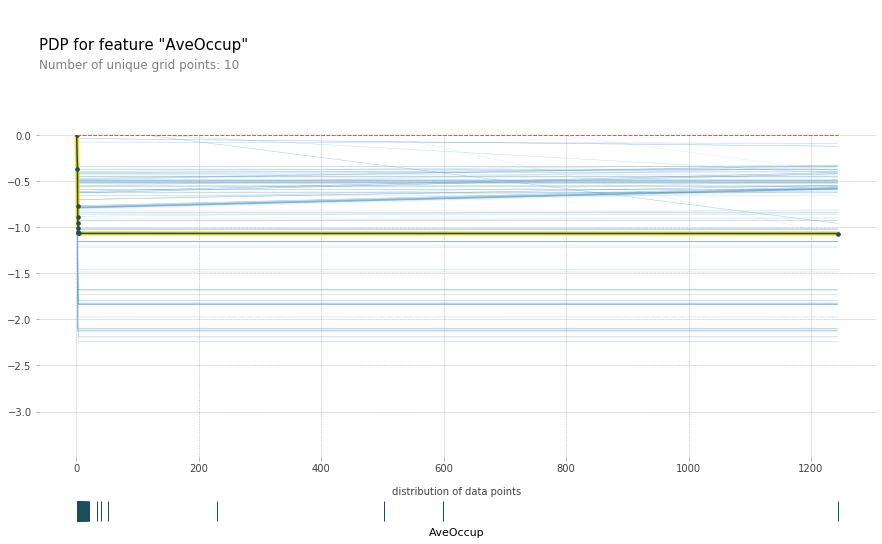

In [18]:
pdp_MedInc = pdp.pdp_isolate(model=regr, 
                             dataset=X_train_reduced, 
                             model_features=X_train_reduced.columns, 
                             feature='AveOccup')
fig, axes = pdp.pdp_plot(pdp_MedInc, 'AveOccup', plot_lines=True, frac_to_plot=100, plot_pts_dist=True);

Thư viện PDPbox cũng cung cấp cả 2 biểu đồ dưới dạng 1D và 2D. Biều đồ 2D phía dưới cho thấy mối quan hệ của giá nhà trung bình với 2 đặc trưng là thu nhập bình quân và độ tuổi của nhà.

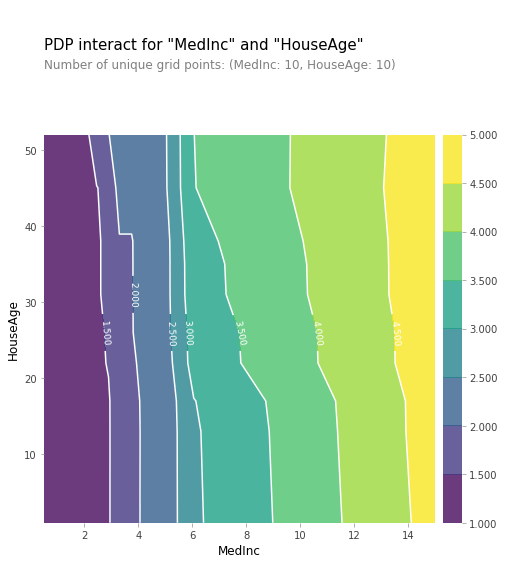

In [19]:
feats = ['MedInc','HouseAge']
p = pdp.pdp_interact(regr,X_train_reduced, 
                     X_train_reduced.columns, 
                     feats)
pdp.pdp_interact_plot(p,feats);

Đón xem những trải nghiệm và phân tích cụ thể từ Zootopi tại:

- 👉Website: https://zootopi.dev/blog
- 👉Youtube: https://youtu.be/jCCbCPVXcpQ
- 👉Facebook: https://www.facebook.com/aizootopi